Complete the exercises below For **Assignment #5**.

In this exercise, we are building a logistic regression classification model. We'll work with the [Pima Indians Diabetes Database](https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database).  

Load the `tidymodels` library. 

In [1]:
library(tidymodels)



── Attaching packages ────────────────────────────────────── tidymodels 1.2.0 ──

✔ broom        1.0.5      ✔ recipes      1.0.10
✔ dials        1.2.1      ✔ rsample      1.2.1 
✔ dplyr        1.1.4      ✔ tibble       3.2.1 
✔ ggplot2      3.5.1      ✔ tidyr        1.3.1 
✔ infer        1.0.7      ✔ tune         1.2.1 
✔ modeldata    1.3.0      ✔ workflows    1.1.4 
✔ parsnip      1.2.1      ✔ workflowsets 1.1.0 
✔ purrr        1.0.2      ✔ yardstick    1.3.1 

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ purrr::discard() masks scales::discard()
✖ dplyr::filter()  masks stats::filter()
✖ dplyr::lag()     masks stats::lag()
✖ recipes::step()  masks stats::step()
• Learn how to get started at https://www.tidymodels.org/start/



The data is located in your homework directory in the `diabetes.csv` file. Read in the data by running the following cell. We are "splitting" the data into training and testing sets. We will evaluate our model's performance with the test set.

In [2]:
diabetes = readr::read_csv('diabetes.csv') |> mutate(Outcome = factor(Outcome))

split = initial_split(diabetes, strata = Outcome)

diabetes_train = training(split)
diabetes_test = testing(split)

Rows: 768 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (9): Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, D...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Glimpse the `diabetes_train` table.

In [3]:
glimpse(diabetes_train)



Rows: 576
Columns: 9
$ Pregnancies              <dbl> 1, 1, 10, 10, 1, 8, 1, 13, 5, 5, 3, 10, 4, 11…
$ Glucose                  <dbl> 85, 89, 115, 139, 103, 99, 97, 145, 117, 109,…
$ BloodPressure            <dbl> 66, 66, 0, 80, 30, 84, 66, 82, 92, 75, 58, 78…
$ SkinThickness            <dbl> 29, 23, 0, 0, 38, 0, 15, 19, 0, 26, 11, 31, 3…
$ Insulin                  <dbl> 0, 94, 0, 0, 83, 0, 140, 110, 0, 0, 54, 0, 19…
$ BMI                      <dbl> 26.6, 28.1, 35.3, 27.1, 43.3, 35.4, 23.2, 22.…
$ DiabetesPedigreeFunction <dbl> 0.351, 0.167, 0.134, 1.441, 0.183, 0.388, 0.4…
$ Age                      <dbl> 31, 21, 29, 57, 33, 50, 22, 57, 38, 60, 22, 4…
$ Outcome                  <fct> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …


❓ Which variable is suitable as the "outcome" in a logistic regression model?

**Answer:**

In [ ]:
The Outcome variable is most suitable

❓ Navigate to [Kaggle page](https://www.kaggle.com/datasets/mathchi/diabetes-data-set) for this dataset. Find descriptions for the `Glucose` and `BMI` columns. Add these descriptions to the [Markdown table](https://www.markdownguide.org/extended-syntax/#tables) below.

| Column name | Description |
| :---------- | :---------- |
| Glucose     |    Plasma glucose concentration a 2 hours in an oral glucose tolerance test.         |
| BMI         |  Body mass index (weight in kg/(height in m)^2).           |

Make a bar chart showing the frequency of each "outcome" in the `Outcome` column from your `diabetes_train` data.

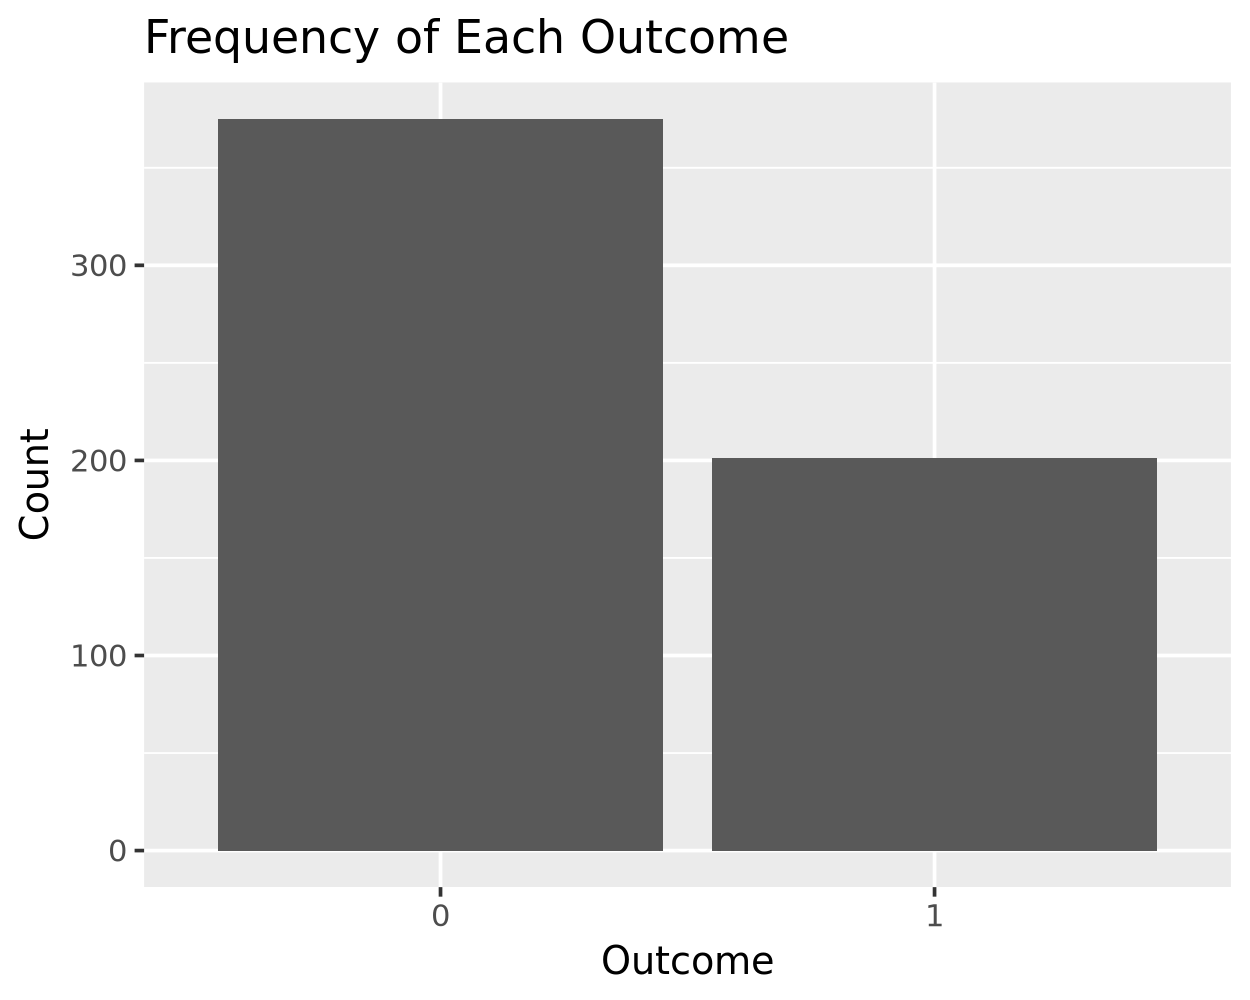

In [4]:
library(ggplot2)

# Bar chart for Outcome frequencies
ggplot(diabetes_train, aes(x = Outcome)) +
    geom_bar() +
    labs(title = "Frequency of Each Outcome", x = "Outcome", y = "Count")


❓ Is the data balanced? I.e. do we have equal counts of each outcome?

**Answer:**

No the data counts are imbalanced



Run the code below to create a table for plotting the predictors we will use in our model: `Glucose` and `BMI`. 

In [5]:
plot_df = diabetes_train |>
    select(Outcome, Glucose, BMI) |>
    pivot_longer(cols = c(Glucose, BMI))

plot_df |> head()

Outcome,name,value
<fct>,<chr>,<dbl>
0,Glucose,85.0
0,BMI,26.6
0,Glucose,89.0
0,BMI,28.1
0,Glucose,115.0
0,BMI,35.3


Using `plot_df`, make a chart showing the relationship of `Glucose` and `BMI` with `Outcome`. 

- use `geom_jitter` for your "geom"
- `facet_wrap` your chart by the `name` variable. (e.g. `facet_wrap(~name, ncol = 2, scales = 'free_x')`)

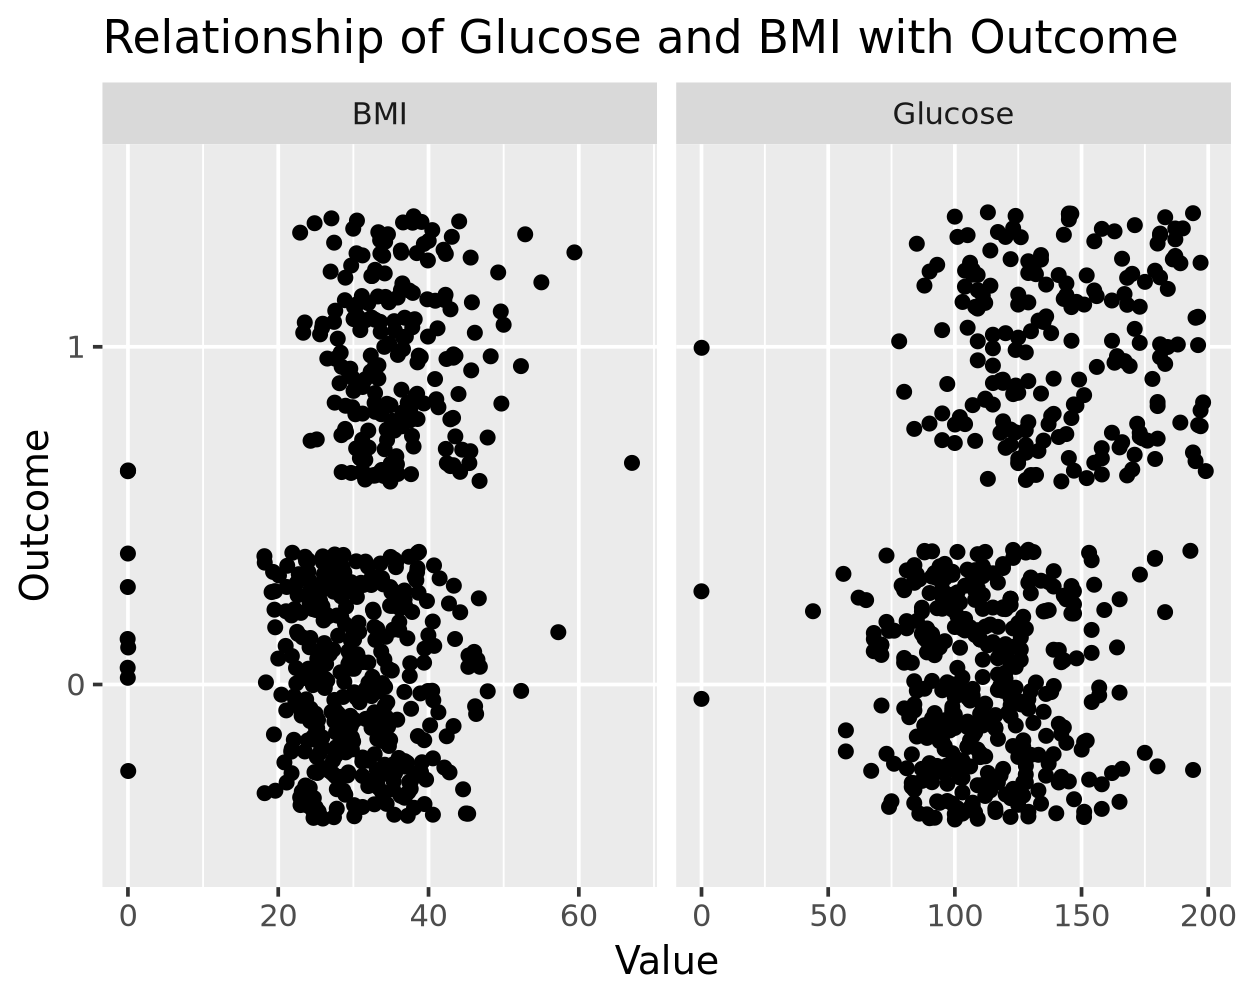

In [6]:

ggplot(plot_df, aes(x = value, y = Outcome)) +
    geom_jitter() +
    facet_wrap(~name, ncol = 2, scales = 'free_x') +
    labs(title = "Relationship of Glucose and BMI with Outcome", x = "Value", y = "Outcome")


❓ What happens when you remove the `scales = 'free_x'` argument from the `facet_wrap` function?

**Answer: It makes the scales on the x-axis the same for BMI and Glucose. Visually this looks bad given the values have different ranges**

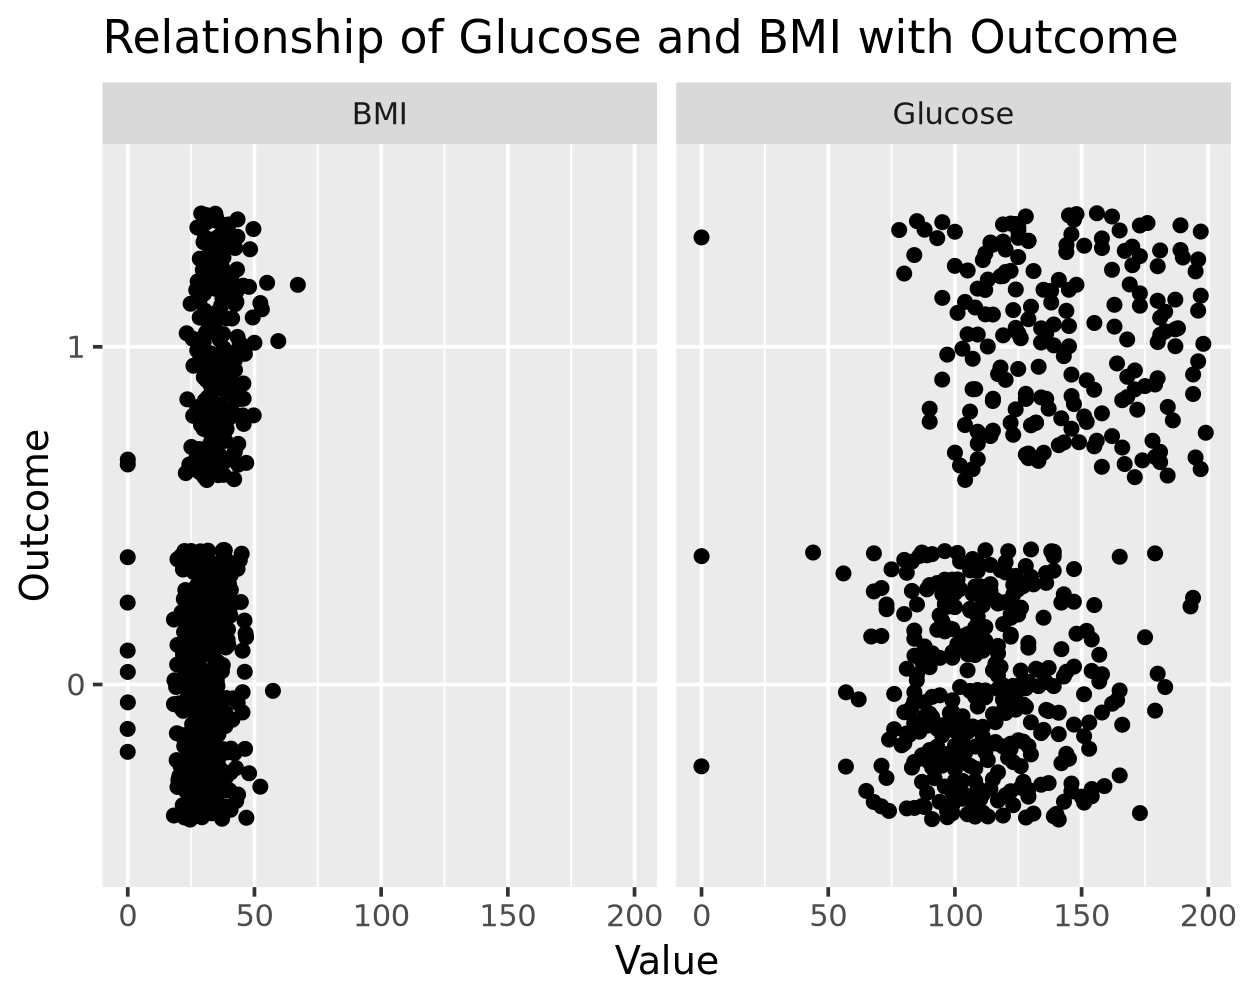

In [7]:
ggplot(plot_df, aes(x = value, y = Outcome)) +
    geom_jitter() +
    facet_wrap(~name, ncol = 2) +
    labs(title = "Relationship of Glucose and BMI with Outcome", x = "Value", y = "Outcome")


Using your training data, build logistic regression model of `Outcome` with `BMI` and `Glucose` as predictors. 
- Use "glm" for you engine
- The formula for your fit function will be `Outcome ~ BMI + Glucose`

In [8]:

mod_fit <- logistic_reg() %>%
  set_engine("glm") %>%
  fit(Outcome ~ BMI + Glucose, data = diabetes_train)


Using `augment` with your fitted model and the `diabetes_test` data as arguments, create a new dataset called `diabetes_test_wPred` that is the `diabetes_test` table including predictions from your model. 

In [10]:
diabetes_test_wPred = augment(mod_fit, new_data = diabetes_test)


Run the code below to generate a confusion matrix for your model predictions. 

(❗️Hint: See Table 4.4 from [*Introduction to Statistical Learning (Version 2)*](https://www.statlearning.com/) for an example confusion matrix.)

In [11]:
diabetes_test_wPred = augment(mod_fit, new_data = diabetes_test)

diabetes_test_wPred |> conf_mat(Outcome, .pred_class)

          Truth
Prediction   0   1
         0 114  30
         1  11  37

❓ Based on the confusion matrix above, 
- How many individuals had diabetes in your test data?
- Of those that actually had diabetes, how many were predicted to have diabetes by your model?
- How many individuals predicted to have diabetes did not have diabetes?

**Answer:
* 67
* 37
* 11
**